In [1]:
import math
import numpy as np
import netCDF4 as nc
import scipy.stats as st
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMinMax

In [2]:
#cutting the data up function
def sample_size(n,prop,conf_level,moe):
    a = ((st.norm.ppf(1-(1-conf_level)/2)**2)*(prop*(1-prop)))/(moe**2)
    b = 1 + (((st.norm.ppf(1-(1-conf_level)/2)**2)*(prop*(1-prop)))/((moe**2)*n))
    
    return math.ceil(a/b)

def run_everything():

    #reading data
    data = nc.Dataset('test_data.nc')
    
    #defining data
    prec = data.variables['tp'][:] * 1000
    lat = data.variables['latitude'][:]
    lon = data.variables['longitude'][:]
    
    #cutting data
    sumatera_data = prec[:,0:43,0:41]
    jabatra_data = prec[:,43:53,44:110]
    borneo_data = prec[:,12:36,56:93]
    celebes_data = prec[:,14:44,94:121]
    papmal_data = prec[:,10:53,125:184]
    
    #reshaping data
    sumatera = np.mean(sumatera_data.reshape(10,12,sumatera_data.shape[1],sumatera_data.shape[2]),axis=0)
    jabatra = np.mean(jabatra_data.reshape(10,12,jabatra_data.shape[1],jabatra_data.shape[2]),axis=0)
    borneo = np.mean(borneo_data.reshape(10,12,borneo_data.shape[1],borneo_data.shape[2]),axis=0)
    celebes = np.mean(celebes_data.reshape(10,12,celebes_data.shape[1],celebes_data.shape[2]),axis=0)
    papmal = np.mean(papmal_data.reshape(10,12,papmal_data.shape[1],papmal_data.shape[2]),axis=0)
    
    #using the function
    samp_sumatra = sample_size(sumatera.shape[1]*sumatera.shape[2],0.5,0.95,0.05)
    samp_jabatra = sample_size(jabatra.shape[1]*jabatra.shape[2],0.5,0.95,0.05)
    samp_borneo = sample_size(borneo.shape[1]*borneo.shape[2],0.5,0.95,0.05)
    samp_celebes = sample_size(celebes.shape[1]*celebes.shape[2],0.5,0.95,0.05)
    samp_papmal = sample_size(papmal.shape[1]*papmal.shape[2],0.5,0.95,0.05)
    
    #reshaping to meet the kmeans requirements
    sumatra_reshape = sumatera.reshape(12,sumatera.shape[1]*sumatera.shape[2]).T.reshape(sumatera.shape[1]*sumatera.shape[2],12,1)
    jabatra_reshape = jabatra.reshape(12,jabatra.shape[1]*jabatra.shape[2]).T.reshape(jabatra.shape[1]*jabatra.shape[2],12,1)
    borneo_reshape = borneo.reshape(12,borneo.shape[1]*borneo.shape[2]).T.reshape(borneo.shape[1]*borneo.shape[2],12,1)
    celebes_reshape = celebes.reshape(12,celebes.shape[1]*celebes.shape[2]).T.reshape(celebes.shape[1]*celebes.shape[2],12,1)
    papmal_reshape = papmal.reshape(12,papmal.shape[1]*papmal.shape[2]).T.reshape(papmal.shape[1]*papmal.shape[2],12,1)
    
    #more reshaping
    sumatra_data = sumatra_reshape[np.random.choice(np.arange(0,sumatra_reshape.shape[0]),samp_sumatra)]
    jabatra_data = jabatra_reshape[np.random.choice(np.arange(0,jabatra_reshape.shape[0]),samp_jabatra)]
    borneo_data = borneo_reshape[np.random.choice(np.arange(0,borneo_reshape.shape[0]),samp_borneo)]
    celebes_data = celebes_reshape[np.random.choice(np.arange(0,celebes_reshape.shape[0]),samp_celebes)]
    papmal_data = papmal_reshape[np.random.choice(np.arange(0,papmal_reshape.shape[0]),samp_papmal)]
    
    
    #not sure what this is
    indo_samples = np.concatenate((sumatra_data,jabatra_data,borneo_data,celebes_data,papmal_data),axis=0)
    
    return indo_samples

In [3]:
indo_samples = run_everything()

#plugging in the time series data
indo_scaled = TimeSeriesScalerMinMax().fit_transform(indo_samples)

#setting seed
seed = 0

#setting the number of clusters
clusters = 3

#this is making the model 
sdtw_km = TimeSeriesKMeans(n_clusters = clusters, metric = "softdtw", metric_params = {"gamma": 0.01}, verbose = True, random_state = seed)

In [4]:
#the prediction
y_pred = sdtw_km.fit_predict(indo_scaled)

0.072 --> 0.036 --> 0.035 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 


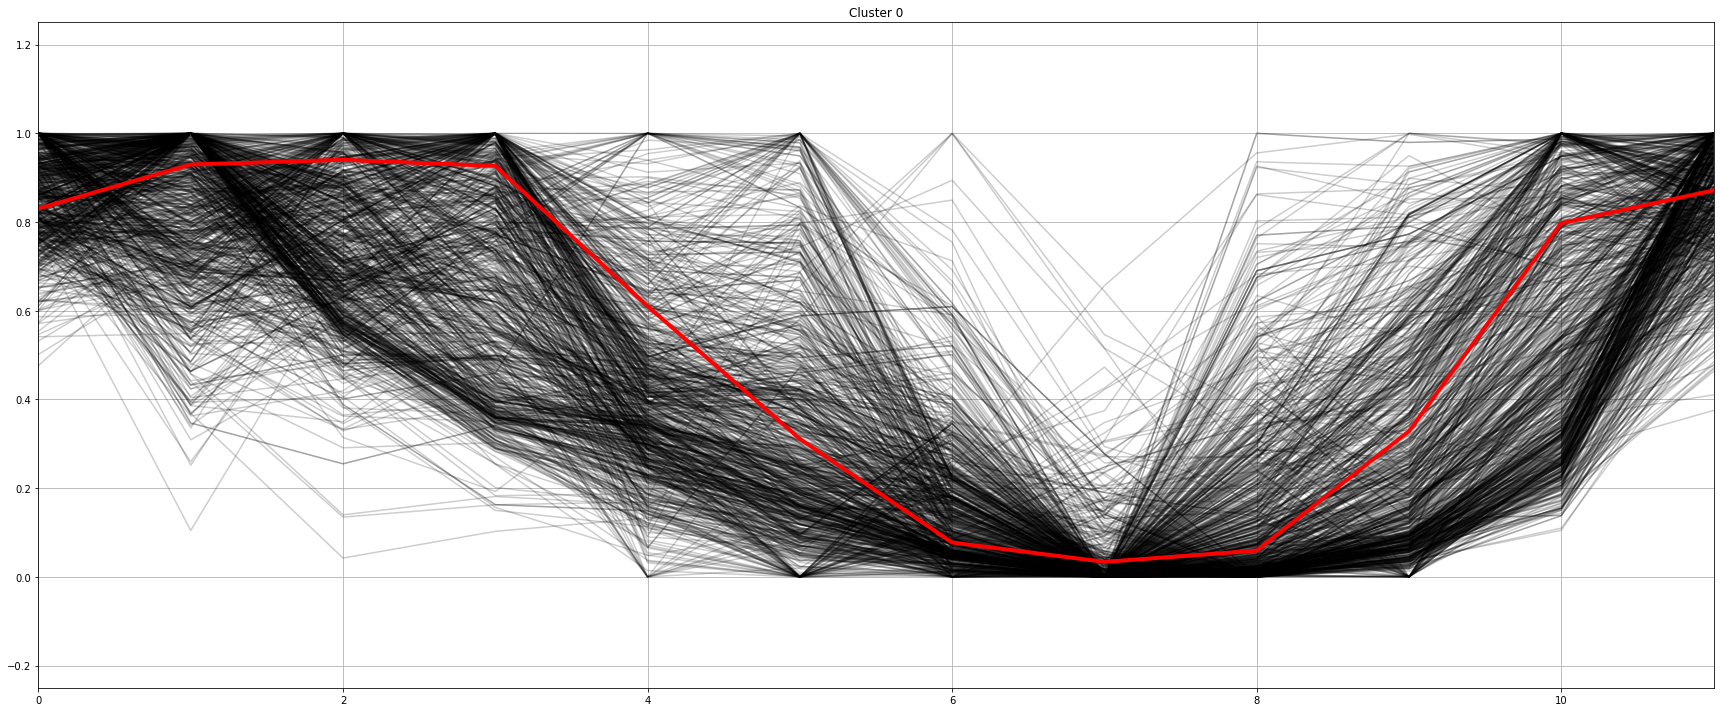

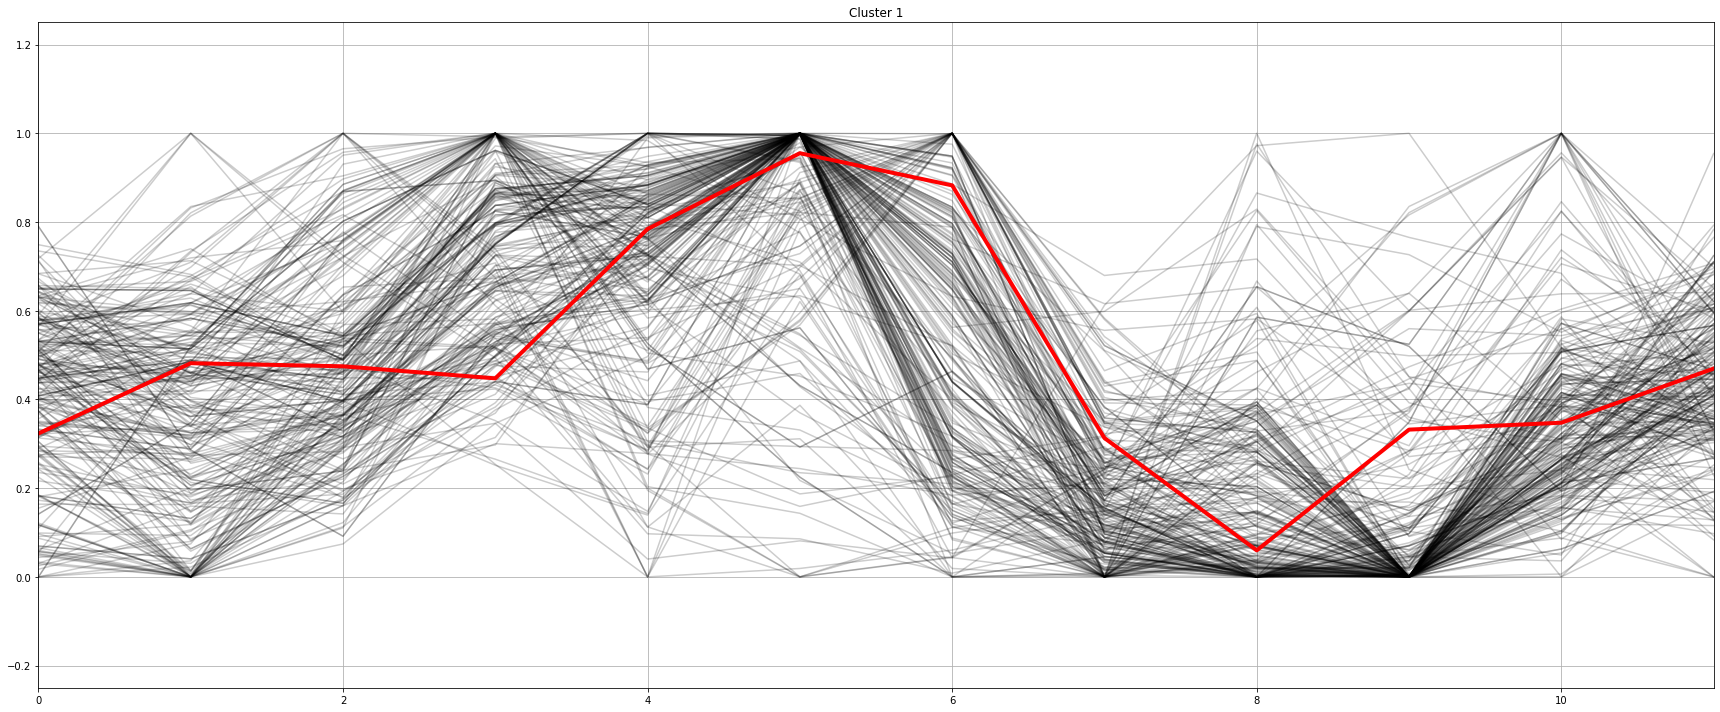

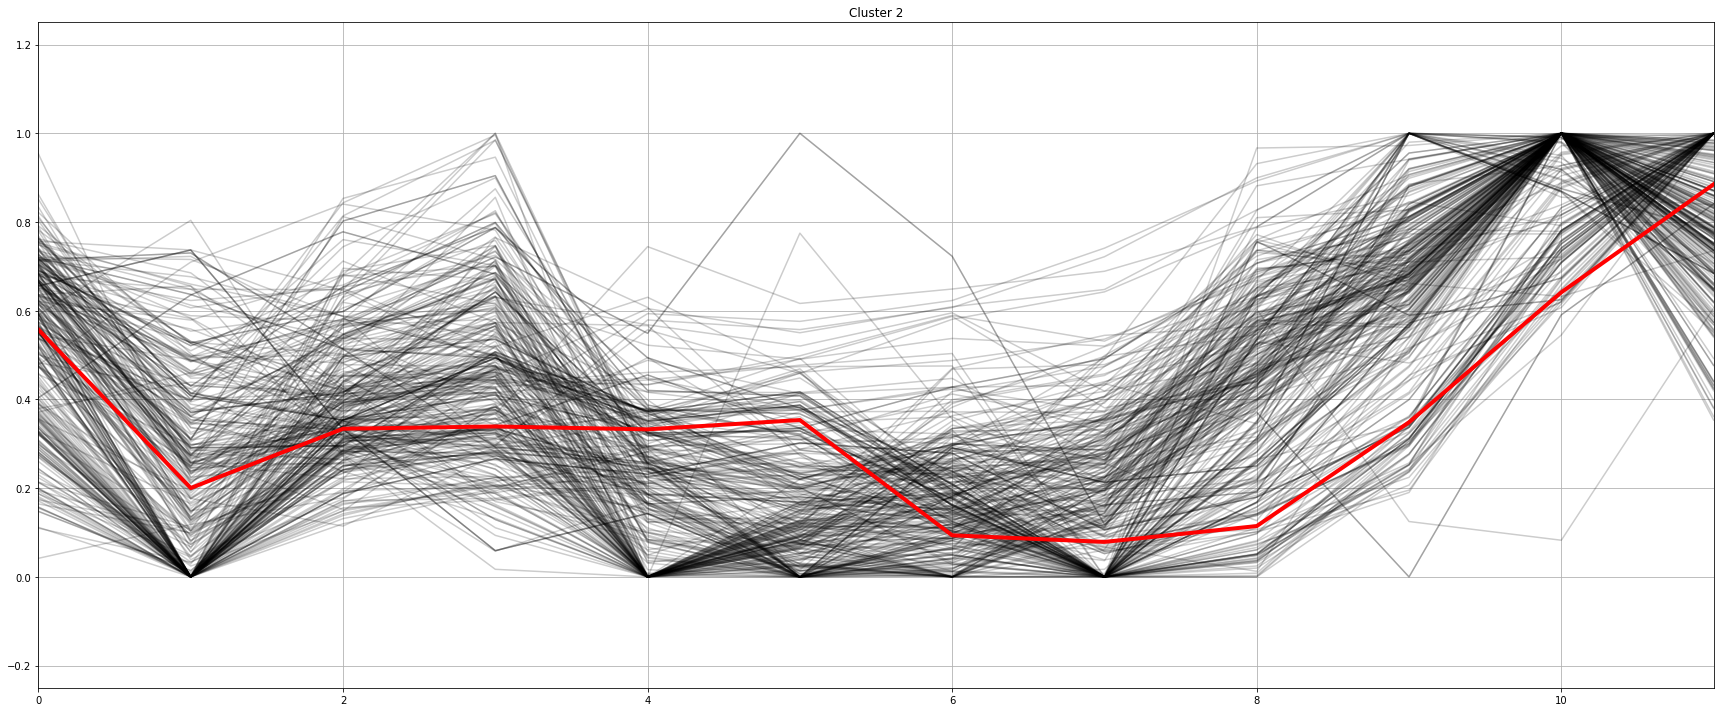

In [5]:
for k in range(3):
    plt.figure(figsize = (24,10))
    for xx in indo_scaled[y_pred == k]:

        plt.plot(xx.ravel(), "k-", alpha = 0.2)
        plt.xlim(0, 11)
        plt.ylim(-0.25, 1.25)

    plt.plot(sdtw_km.cluster_centers_[k].ravel(), "r-", linewidth = 4)
    plt.title("Cluster {}".format(k))
    plt.tight_layout()
    plt.grid()
    plt.show()

In [6]:
#getting the optimal squared
sum_of_squared_distances = []

K = range(1, 15)

for k in K:
    
    km = TimeSeriesKMeans(n_clusters = k, metric = "softdtw", metric_params = {"gamma": 0.01}, verbose = True, random_state = 0)
    km = km.fit(indo_scaled)
    sum_of_squared_distances.append(km.inertia_)

0.740 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 0.143 --> 
0.152 --> 0.055 --> 0.055 --> 0.056 --> 0.056 --> 0.056 --> 0.056 --> 0.056 --> 0.056 --> 
0.072 --> 0.036 --> 0.035 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 0.034 --> 
0.057 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 0.027 --> 
0.039 --> 0.020 --> 0.019 --> 0.019 --> 0.019 --> 0.019 --> 0.019 --> 0.019 --> 0.019 --> 0.019 --> 0.019 --> 0.019 --> 0.019 --> 0.019 --> 0.019 --> 0.019 --> 0.019 --> 0.019 --> 0.019 --> 0.019 

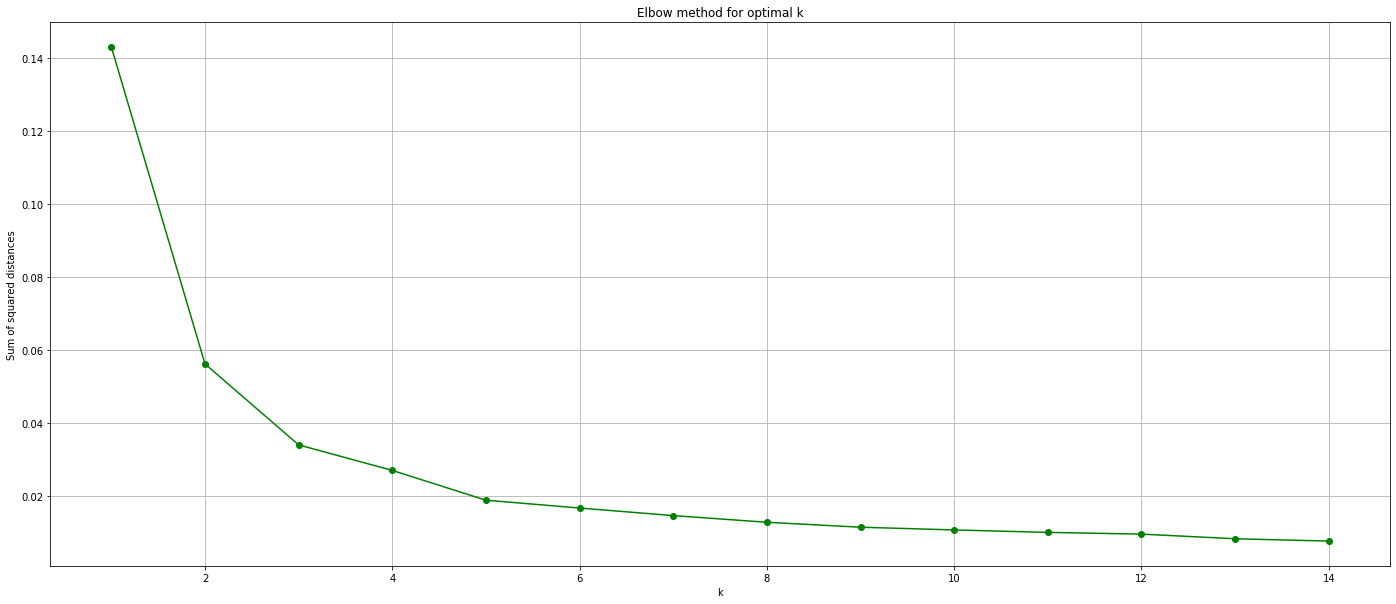

In [8]:
plt.figure(figsize = (24, 10))
plt.plot(K, sum_of_squared_distances, "go-")
plt.xlabel("k")
plt.ylabel("Sum of squared distances")
plt.title("Elbow method for optimal k")
plt.grid()
plt.show()